In [55]:
import numpy as np
data = np.genfromtxt("../../hier_cluster_ldpruned/admix_50_5gen.wffix.maf1p.ld.pca.eigenvec")

In [56]:
import umap

In [57]:
umap_t = umap.UMAP(n_neighbors=20, min_dist=0.01).fit(data[:,2:22])


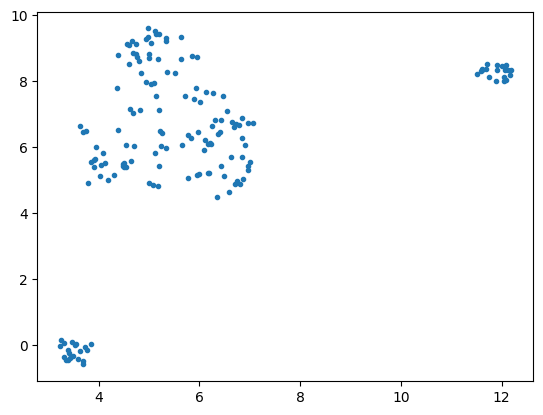

In [58]:
plt.plot(umap_t.embedding_[:,0],umap_t.embedding_[:,1],'.')


In [59]:
import scipy
embed_dist = scipy.spatial.distance.cdist( umap_t.embedding_, umap_t.embedding_)

In [60]:
import numpy as np
np.corrcoef(embed_dist, umap_t.graph_.toarray())

array([[ 1.00000000e+00,  9.91310002e-01,  9.98972398e-01, ...,
         1.79578170e-02, -2.08250693e-02,  2.19485991e-02],
       [ 9.91310002e-01,  1.00000000e+00,  9.95533636e-01, ...,
         3.20756851e-02,  6.19292532e-04,  2.71732640e-02],
       [ 9.98972398e-01,  9.95533636e-01,  1.00000000e+00, ...,
         2.47897038e-02, -1.38906514e-02,  2.61772771e-02],
       ...,
       [ 1.79578170e-02,  3.20756851e-02,  2.47897038e-02, ...,
         1.00000000e+00,  1.31203762e-02,  3.95727856e-01],
       [-2.08250693e-02,  6.19292532e-04, -1.38906514e-02, ...,
         1.31203762e-02,  1.00000000e+00, -3.59555854e-02],
       [ 2.19485991e-02,  2.71732640e-02,  2.61772771e-02, ...,
         3.95727856e-01, -3.59555854e-02,  1.00000000e+00]])

In [61]:
from scipy.stats.stats import pearsonr 
pearsonr(embed_dist.flatten(), umap_t.graph_.toarray().flatten())

/tmp/ipykernel_2232354/1316243929.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=-0.33590853144093186, pvalue=0.0)

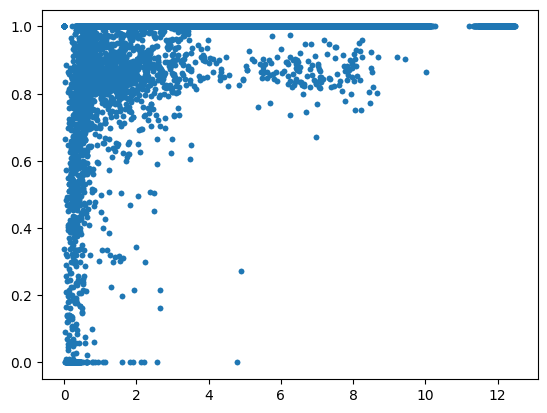

In [62]:
import matplotlib.pyplot as plt
plt.plot(embed_dist.flatten(), 1-umap_t.graph_.toarray().flatten(),".")

In [63]:
np.savetxt("test"+".pc20.umap.embed.dist",embed_dist, fmt = "%.4f", delimiter = "\t")

In [64]:
import umap.spectral

In [83]:
init2 = umap.spectral.spectral_layout(data, umap_t.graph_, 2, 101)
init3 = umap.umap_.noisy_scale_coords(
            init2, 101, max_coord=10, noise=0.0001
        )

AttributeError: module 'umap.umap_' has no attribute 'noisy_scale_coords'

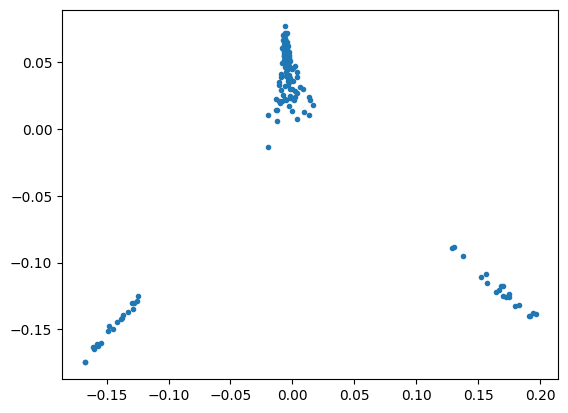

In [66]:
plt.plot(init[:,0],init[:,1],".")

In [78]:
import numpy as np
head = umap_t.graph_.tocoo().row
tail = umap_t.graph_.tocoo().col
weight = umap_t.graph_.tocoo().data
round2 =  umap.layouts.optimize_layout_euclidean(
                init2,
                init2,  # Fixes #179 & #217,
                head,
                tail,
                20,
                umap_t.graph_.tocoo().shape[1],
                20,
                umap_t._a,
                umap_t._b,
                20,
                umap_t.repulsion_strength,
                umap_t._initial_alpha / 4.0,
                umap_t.negative_sample_rate,
                parallel=True,
                verbose=False,
                densmap=False,
                densmap_kwds=None,
                tqdm_kwds=None,
                move_other=True,
            )

AttributeError: 'float' object has no attribute 'copy'

In [72]:
init

array([[-8.14723990e-03,  6.05145985e-02],
       [-5.42746961e-03,  5.83638068e-02],
       [-6.16315134e-03,  5.38146436e-02],
       [-6.01086316e-03,  7.15581924e-02],
       [-3.89589631e-03,  5.74855152e-02],
       [-7.15827206e-03,  7.05004365e-02],
       [-7.30398108e-03,  6.63991982e-02],
       [-6.12352440e-03,  6.74723237e-02],
       [-5.03297281e-03,  6.34304137e-02],
       [-5.69729255e-03,  6.71045053e-02],
       [-6.95702034e-03,  6.25739837e-02],
       [-6.24334744e-03,  6.45336757e-02],
       [-5.52469383e-03,  7.09647424e-02],
       [-6.81795670e-03,  6.49418967e-02],
       [-4.35683301e-03,  5.94511324e-02],
       [-7.51350639e-03,  6.00017930e-02],
       [-6.82141421e-03,  6.85414555e-02],
       [-6.43733160e-03,  5.48739803e-02],
       [-6.04358116e-03,  6.71736334e-02],
       [-6.30828490e-03,  7.66743404e-02],
       [-1.28682003e-01, -1.34782288e-01],
       [-1.67763105e-01, -1.74771601e-01],
       [-1.57418859e-01, -1.61230838e-01],
       [-1.